# Homework 2 - balancing, transformations, and dimensionality reduction (deadline 22. 12. 2024, 23:59)

In short, the main task is to play with balancing, binning, transformations, and dimensionality reduction to obtain the best results for the binary classification task.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0). Split the dataset into a train, validation, and test set and **use these parts correctly (!)** in the following steps.
  1. Choose at least one classification algorithm whose performance is to be improved in the following steps.
  1. Use at least two binning methods (on features of your choice, with your choice of parameters) and comment on their effects on classification performance. _I.e., one kind of classifier trained for each binning and a comparison of the effect of binning methods against each other._ _(4 points, depends on creativity)_ 
  1. Use at least two data balancing techniques on the correct part of the dataset and comment on its effects on classification performance. Focus on the comparison of methods between each other. _I.e., one type of classifier trained for each balancing and a comparison of the effect of balancing methods against each other._ **Just copied code from tutorial four will not be accepted.** _(6 points, depends on creativity)_
  1. Transform the features appropriately and prepare new ones (i.e., feature engineering) - focus on the increase in the model's performance (possibly in combination with further steps). _(5 points, depends on creativity)_ 
  1. Try to find some suitable subset of features - use at least two feature selection methods. Evaluate your choice on the validation set and discuss the influence. Do not use PCA (principal component analysis) in this step. Manual selection will not be accepted. _(4 points, depends on creativity)_
  1. Use PCA to reduce the dimensionality. Discuss the influence of the number of principal components. _(4 points)_
  1. Try to find the best combination of the previous steps and run final classification tests on the correct part of the dataset - first for the original data, second for the best-found combination of the previous preprocessing steps. Compare the results and discuss (give a comment, use graphs, and so on). _(5 points)_

All your steps, choices, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for _2 points_ together with the final presentation of the solution.

**If you do all this properly, you will obtain 30 points.**

### FAQ

* Select the appropriate metric to evaluate the classification results.
* In steps 2 and 3, you are comparing methods against each other, not their effect on unadjusted data. However, you can comment on that, too.
* You choose the subset of features only in step 2 because of the binning methods. In the other steps, you work with the whole dataset.

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

  
## Data description

* The dataset can be downloaded [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
* The data are devoted to the binary classification task. The aim is to predict the probability that a driver will initiate an auto insurance claim next year.
* The target feature is called 'y' and signifies whether or not a claim was filed for that policyholder.
* To fulfill the task, one does not need to know the meaning of predictors.
* Predictors that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix _bin_ to indicate binary features and the postfix _cat_ to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
* While using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), control the shuffling of data by random_state parameter. Do not use shuffle=False, probably never (can cause systematic error).

# Homework

## 1. Importing modules & reading data

In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter("ignore", UserWarning)

RND_SEED = 42

We will read categorical and binary data as int8, because it will drop size of a dataframe from 150 MiB to 80 MiB

In [3]:
from sklearn.model_selection import train_test_split

bin_cat_data = [
    'xind_02_cat', 'xind_04_cat', 'xind_05_cat', 'xcar_01_cat', 'xcar_02_cat', 'xcar_03_cat',
    'xcar_04_cat', 'xcar_05_cat', 'xcar_06_cat', 'xcar_07_cat', 'xcar_08_cat', 'xcar_09_cat',
    'xcar_10_cat', 'xcar_11_cat', 'xind_02_cat', 'xind_04_cat', 'xind_05_cat', 'xcar_01_cat',
    'xcar_02_cat', 'xcar_03_cat', 'xcar_04_cat', 'xcar_05_cat', 'xcar_06_cat', 'xcar_07_cat',
    'xcar_08_cat', 'xcar_09_cat', 'xcar_10_cat', 'xcar_11_cat',
    'xind_06_bin', 'xind_07_bin', 'xind_08_bin', 'xind_09_bin', 'xind_10_bin', 'xind_11_bin',
    'xind_12_bin', 'xind_13_bin', 'xind_16_bin', 'xind_17_bin', 'xind_18_bin', 'xcalc_15_bin',
    'xcalc_16_bin', 'xcalc_17_bin', 'xcalc_18_bin', 'xcalc_19_bin', 'xcalc_20_bin',
    'y'
]

float_data = [
    'xind_01', 'xind_03', 'xind_14', 'xind_15',
    'xcar_11', 'xcalc_04', 'xcalc_05', 'xcalc_06',
    'xcalc_07', 'xcalc_08', 'xcalc_09', 'xcalc_10',
    'xcalc_11', 'xcalc_12', 'xcalc_13', 'xcalc_14'
]

data = pd.read_csv(
    'data.csv',
    dtype = ({
         col:'int8' for col in bin_cat_data
    } | {
        col : 'float' for col in float_data
    }
    )
)
X = data.drop(columns=['y'])
y = data['y']

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.4, random_state=RND_SEED
)

Xval, Xtest, yval, ytest = train_test_split(
    Xtest, ytest, test_size=0.5, random_state=RND_SEED
)

print(f"Number of features: {Xtrain.shape[1]}")
print(f"Number of samples in train set: {Xtrain.shape[0]}")
print(f"Number of samples in validation set: {Xval.shape[0]}")
Xtrain.head(3)

Number of features: 57
Number of samples in train set: 357127
Number of samples in validation set: 119042


,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,...,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
265163,2.0,1,8.0,0,0,0,0,1,0,0,...,6.0,0.0,3.0,2.0,0,0,0,0,0,1
429303,0.0,1,3.0,1,0,1,0,0,0,0,...,4.0,2.0,1.0,9.0,1,0,1,0,0,0
79518,1.0,2,1.0,0,0,1,0,0,0,0,...,6.0,3.0,5.0,9.0,0,1,1,1,0,0


In [4]:
cols = pd.Series(Xtrain.columns)
nominal_cols = cols.str.extract(r'^(.*_cat)$', expand=False).dropna().to_list()
binary_cols = cols.str.extract(r'^(.*_bin)$', expand=False).dropna().to_list()
num_ord_cols = list(set(cols) - set(nominal_cols) - set(binary_cols))
print(f"Number of binary columns: {len(binary_cols)}")
print(f"Number of nominal columns: {len(nominal_cols)}")
print(f"Number of numerical or ordinal columns: {len(num_ord_cols)}")

Number of binary columns: 17
Number of nominal columns: 14
Number of numerical or ordinal columns: 26


In [5]:
pos_rate = ytrain.mean()
print(f"Positive rate: {pos_rate * 100:.2f}%")

Positive rate: 3.62%


We can see that our dataset is extremly unbalanced, so we will account for that later.

In [6]:
cols = pd.Series(Xtrain.columns)
nominal_cols = cols.str.extract(r'(.*_cat.*)', expand=False).dropna().to_list()
binary_cols = cols.str.extract(r'(.*_bin.*)', expand=False).dropna().to_list()
num_ord_cols = list(set(cols) - set(nominal_cols) - set(binary_cols))
print(f"Number of binary columns: {len(binary_cols)}")
print(f"Number of nominal columns: {len(nominal_cols)}")
print(f"Number of numerical or ordinal columns: {len(num_ord_cols)}")

Number of binary columns: 17
Number of nominal columns: 14
Number of numerical or ordinal columns: 26


## 2. Choosing classifier

We will evaluate models using ROC AUC score, it is sensitive to unbalanced datasets such as the one we have.

Our predictor will be a decision tree optimizing for Gini index, which is equivalent to [maximazing ROC AUC score](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve). We will allow for tree of maximal depth 15, it corresponds to 32K leaves.

Trees can work with ordinally encoded categories and nans encoded as negative one, so we need not to preprocess data any further.

Lastly, we will print accuracy for better understanding of the prediction process.


We will define two generic functions, one for evaluating given data and other one for evaluating solo transformers

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score as ROCAUC

def evaluate_data(Xtrain, Xval, ytrain=ytrain, yval=yval):
    global RND_SEED
    clf = DecisionTreeClassifier(
        random_state=RND_SEED, criterion='gini', max_depth=15, splitter='random'
    ).fit(Xtrain, ytrain)
    ytrain_pred = clf.predict(Xtrain)
    yval_pred = clf.predict(Xval)
    ytrain_pred_proba = clf.predict_proba(Xtrain)[:,1]
    yval_pred_proba = clf.predict_proba(Xval)[:,1]
    
    acc_train = accuracy_score(ytrain, ytrain_pred)
    acc_val = accuracy_score(yval, yval_pred)
    print(f"Accuracy train score: {acc_train * 100 : .2f}%")
    print(f"Accuracy valid score: {acc_val * 100 : .2f}%")
    auc_train = ROCAUC(ytrain, ytrain_pred_proba)
    auc_val = ROCAUC(yval, yval_pred_proba)
    print(f"\nROC AUC train score: {auc_train * 100 : .2f}%")
    print(  f"ROC AUC valid score: {auc_val * 100 : .2f}%")

def evaluate_transformer(trnf, Xtrain=Xtrain, Xval=Xval, ytrain=ytrain, yval=yval):
    Xtrain_ = trnf.fit_transform(Xtrain, ytrain)
    Xval_ = trnf.transform(Xval)
    evaluate_data(Xtrain_, Xval_, ytrain, yval)
    

In [8]:
%%time
evaluate_data(Xtrain, Xval)

Accuracy train score:  96.80%
Accuracy valid score:  95.81%

ROC AUC train score:  74.79%
ROC AUC valid score:  55.08%
CPU times: user 4.41 s, sys: 166 ms, total: 4.58 s
Wall time: 4.58 s


## 3. Binning

We will use two strategies to bin data. First one will be to bin data into buckets of equal width (such width will be determined during training), second one will be to bin into buchekts of equal depth(the number of data points in each bucket and its range is determined on training data). Both of this approaches are implemented in scikit-learn by KBinsDiscretizer class parametrized by strategy and n_bins hyperparameters.

"Uniform" strategy implements bins of equal width. During fit discretizer finds minimum and maximum of each discretized feature and divided into n_bins equal intervals, where each sample falls. New data that is out of range will fall into corresponding edge interval.

"Quantile" strategy implements the second approach, where each bin has the same amount of samples from train set. While training, transformer will sort all values and determine n_bins equal quantiles, for example if we were to choose 4 buckets it will devide data set on 1st quartile, median and 3rd quartile. New data is transformed similliarly to uniform strategy.

We will bin only numerical and ordinal data into 100 bins and compare approaches where we use all features (including binned ones) against only transformed features.

Last but not least we need to decide on encdoing of binned data. We are using decision tree, so we can encode them ordinally.

In [9]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

uni_disc_ord = ColumnTransformer([
    ('Discretizer', KBinsDiscretizer(
        n_bins=100, encode='ordinal', strategy='uniform', subsample=None, random_state=RND_SEED
    ), num_ord_cols)
], remainder='drop')

qua_disc_ord = ColumnTransformer([
    ('Discretizer', KBinsDiscretizer(
        n_bins=100, encode='ordinal', strategy='quantile', subsample=None, random_state=RND_SEED
    ), num_ord_cols)
], remainder='drop')

uni_disc_all = ColumnTransformer([
    ('Discretizer', KBinsDiscretizer(
        n_bins=100, encode='ordinal', strategy='uniform', subsample=None, random_state=RND_SEED
    ), num_ord_cols)
], remainder='passthrough')

qua_disc_all = ColumnTransformer([
    ('Discretizer', KBinsDiscretizer(
        n_bins=100, encode='ordinal', strategy='quantile', subsample=None, random_state=RND_SEED
    ), num_ord_cols)
], remainder='passthrough')

In [10]:
print("Uniform length bins, ordinal numerical features only")
evaluate_transformer(uni_disc_ord)

Uniform length bins, ordinal numerical features only
Accuracy train score:  96.80%
Accuracy valid score:  95.80%

ROC AUC train score:  75.49%
ROC AUC valid score:  53.94%


In [11]:
print("Uniform length bins, all features")
evaluate_transformer(uni_disc_all)

Uniform length bins, all features
Accuracy train score:  96.78%
Accuracy valid score:  95.84%

ROC AUC train score:  74.92%
ROC AUC valid score:  55.02%


In [12]:
print("Equal amount of data points in bins, ordinal numerical features only")
evaluate_transformer(qua_disc_ord)

Equal amount of data points in bins, ordinal numerical features only
Accuracy train score:  96.90%
Accuracy valid score:  95.59%

ROC AUC train score:  80.81%
ROC AUC valid score:  52.75%


In [13]:
print("Equal amount of data points in bins, all features")
evaluate_transformer(uni_disc_all)

Equal amount of data points in bins, all features
Accuracy train score:  96.78%
Accuracy valid score:  95.84%

ROC AUC train score:  74.92%
ROC AUC valid score:  55.02%


Scores for both binning methods with all features are the same, but equal-width binning performed better as standalone transformer.

Scores for all binning methods, regardless of whether we used all features or binned ones, are worse than scores on raw data. It is sensible, because decision tree training is nothing more than creating most optimal bins in each node. By binning features we have restricted its ability to find the best borders, so its performance plumned. Another point to notice is that using binary and nominal features actually brought additional ~2% in ROC AUC validation score compared to using continiuos and ordinal features alone, so we can conclude that those features are actuaaly informative.

## 4. Data balancing

This step might have the highest impact on model's performance, due to great class imbalance. We will use two methods to solve it: undersampling and oversampling. Both methods will be using imbalanced-learn's implementations of algorithms. 

### Undersampling

We will remove excess points in major class, we will use Near Miss algorithm. This algorithm computes average distance $d_1$ and $d_0$ to $k$ nearest neighbors in both classes for each majority population samples and deletes samples, that are closer to minority class, that to majority $d_1 > d_0$. It repeates this approach until dataset is either balanced or no data points satisfy inequality above.

We have an enormous dataset, so $k=3$ will be enough.

In [14]:
%%time
from imblearn.under_sampling import NearMiss

Xunder, yunder = NearMiss(n_jobs=-1, n_neighbors=3).fit_resample(Xtrain, ytrain)

print(f"Number of samples in original data {ytrain.count()}, positive rate: {ytrain.mean():.3f}")
print(f"Number of samples in undersampled data {yunder.count()}, positive rate: {yunder.mean():.3f}")

Number of samples in original data 357127, positive rate: 0.036
Number of samples in undersampled data 25866, positive rate: 0.500
CPU times: user 38.1 s, sys: 122 ms, total: 38.2 s
Wall time: 10.5 s


In [15]:
evaluate_data(
    Xunder, Xval, yunder, yval
)

Accuracy train score:  87.14%
Accuracy valid score:  41.52%

ROC AUC train score:  93.06%
ROC AUC valid score:  54.47%


Here we can see a very interesting dynamic. Accuracy on both train and validation datasets sank, where validation accuracy fall lower than 50%. It is an expected outcome, because we have decreased number of samples of one class, so decision tree will be less likely to choose it. On the other hand we have 93% training and 54.5% validation ROC AUC score. Validation score has sank only 0.5% from that of raw data, but training score stepped 18% up. This indicates that our model is able to distinguish between classes quite good with probability on training set and fails to achieve the same on validation. Most probably we had significantly changed decision boundaries for classes, so tree picked up false information. 

This could be addressed by regularizing our model, but this gets out of scope of this homework.

### Oversampling

We will create new positive samples using Borderline SMOTE algorithm. It is a variation on oridinary SMOTE algorithm, so we will describe it firstly. For each minority population sample $s_O$ SMOTE finds its $k$ nearest neighbors and for each neihgbor $s_N$ computes random convex combination, in other terms it generates a sample "between" two original ones using this formula $t \cdot s_O + (1 - t) \cdot s_N$, where $t$ is driven from continuos uniform distribution from zero to one.

Borderline SMOTE goes a step further. It divides all samples in three distinct groups based on their $m$ nearest neighbors in dataset. Those that have most of $m$ neighbors from different class are classified as "noise"; Those that have at least half of their neighbors in their respecting classes and at least one neighbor comes from different class are classified as "in danger" (borderline); Those that have all their neighbors from the same class are classified as "safe". Then Borderline SMOTE generates new samples using ordinary SMOTE only on "borderline samples". 

Due to conditioned pooling, Borderline SMOTE is less likely to change decision boundary of classes, where SMOTE would generate new samples that extend into other class' region.

The only downside to SMOTEs is its inability to work with categorical data, because convex combination will always create values out of set for categorical values.

Minority class is miniscule, so we can choose large enough $k = 5$ and $m= 10$ to obtain more robust results.

In [16]:
%%time
from imblearn.over_sampling import BorderlineSMOTE

Xover, yover = BorderlineSMOTE(k_neighbors=5, m_neighbors=10, random_state=RND_SEED).fit_resample(Xtrain, ytrain)

print(f"Number of samples in original data {ytrain.count()}, positive rate: {ytrain.mean():.3f}")
print(f"Number of samples in oversampled data {yover.count()}, positive rate: {yover.mean():.3f}")

Number of samples in original data 357127, positive rate: 0.036
Number of samples in oversampled data 688388, positive rate: 0.500
CPU times: user 38.5 s, sys: 342 ms, total: 38.8 s
Wall time: 11.3 s


In [17]:
evaluate_data(
    Xover, Xval, yover, yval
)

Accuracy train score:  93.85%
Accuracy valid score:  90.15%

ROC AUC train score:  98.38%
ROC AUC valid score:  52.30%


In some sense we obtain similiar results to undersampled data, but we had not killed accuracy (one of the possible reasons could be boundary keeping property of Borderline SMOTE) and training ROC AUC score is even higher, while validation ROC AUC score is even lower. This can be addressed by regularization as it was in undersampling.

## 5. Feature engineering

Usually new features are engineered based on domain knowledge, but in this task we know nothing about features, so we are left to book methods of feature generating. One of the most common methods is applying non-linear functions to numeric features and training models on such augmented features, common choices are polynomials (powers and multilicative interactions of features), exponentials and logarithms. Last two functions are monotonic, so they will have no effect on models, same holds for powers of features. We will create "interaction features", such feature is a product of two distinct features, so they will hold more information and can be more useful for decision tree.

Lastly we will compute $\exp(-\lVert \mathbf{x}_t\rVert^2)$, where $\mathbf{x}_t$ is vector of topic specific features like "car" or "reg". We will use $L^2$ norm for that.

In [18]:
from sklearn.base import TransformerMixin, BaseEstimator

class RadialBaseGaussian(BaseEstimator, TransformerMixin):

    def __init__(self, norm='l2'):
        self.norm = norm
        self.output_transform = 'pandas'
        self.fit()

    def fit(self, X=None, y=None):
        self.is_fitted_ = True
        return self

    def set_output(self, *, transform):
        self.output_transform = transform

    def transform(self, X):
        res = None
        if type(self.norm) == str:
            if self.norm == 'l2':
                res = np.linalg.norm(X, ord=2, axis=1, keepdims=True)
            elif self.norm == 'l1':
                res = np.linalg.norm(X, ord=1, axis=1, keepdims=True)
            else:
                raise ValueError("String norm must be either 'l1' or 'l2'.")
        else:
            res = self.norm(X)
        if self.output_transform == 'pandas':
            res = pd.DataFrame({'rbg' : res.flatten()}, index=X.index)
        return res

Let's group features by their topic

In [19]:
topics = Xtrain.columns.str.extract(r'([^_]+)_\d+.*$', expand=False).unique().to_list()

columns_for_topics = []

for pat in topics:
    columns_for_topics.append(
        Xtrain.columns[Xtrain.columns.str.contains(pat)].to_list()
    )

columns_for_topics[3]

['xcalc_01',
 'xcalc_02',
 'xcalc_03',
 'xcalc_04',
 'xcalc_05',
 'xcalc_06',
 'xcalc_07',
 'xcalc_08',
 'xcalc_09',
 'xcalc_10',
 'xcalc_11',
 'xcalc_12',
 'xcalc_13',
 'xcalc_14',
 'xcalc_15_bin',
 'xcalc_16_bin',
 'xcalc_17_bin',
 'xcalc_18_bin',
 'xcalc_19_bin',
 'xcalc_20_bin']

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, make_pipeline as pipeline

feature_engineer = pipeline(
    FeatureUnion([
        ('topic_rbg', ColumnTransformer([
            (topics[i], RadialBaseGaussian(), columns_for_topics[i])
            for i in range(4)
        ], n_jobs=-1)),
        ('bin_pass', ColumnTransformer([
            ('bin_pass', 'passthrough', binary_cols),
            ('nom_pass', 'passthrough', nominal_cols),
            # ('num_ord_pass', 'passthrough', num_ord_cols)
            ('poly', PolynomialFeatures(2, include_bias=False, interaction_only=True), num_ord_cols)
        ])),
    ], n_jobs=-1, verbose_feature_names_out=True),
).set_output(transform='pandas')

feature_engineer

Pipeline(steps=[('featureunion',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('topic_rbg',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('xind',
                                                                                  RadialBaseGaussian(),
                                                                                  ['xind_01',
                                                                                   'xind_02_cat',
                                                                                   'xind_03',
                                                                                   'xind_04_cat',
                                                                                   'xind_05_cat',
                                                                                   'xind_06_bin',
                                                                                   'xind_07_bin',
                                                                                   'xind_08_bin',
                                                                                   'xind_09_bin',
                                                                                   'xind_10_bin',
                                                                                   'xind_11_bin',
                                                                                   'xind_12_bin',
                                                                                   'xind_13_bin',
                                                                                   'xind_14',
                                                                                   'xind_15...
                                                                                 ('poly',
                                                                                  PolynomialFeatures(include_bias=False,
                                                                                                     interaction_only=True),
                                                                                  ['xind_15',
                                                                                   'xcalc_10',
                                                                                   'xcalc_09',
                                                                                   'xcar_12',
                                                                                   'xcalc_03',
                                                                                   'xreg_01',
                                                                                   'xcalc_08',
                                                                                   'xcalc_07',
                                                                                   'xind_01',
                                                                                   'xcar_11',
                                                                                   'xcalc_14',
                                                                                   'xreg_02',
                                                                                   'xcalc_05',
                                                                                   'xcar_13',
                                                                                   'xcar_14',
                                                                                   'xcalc_12',
                                                                                   'xcalc_04',
                                                                                   'xreg_03',
                                                                                   'xind_03',
      

In [21]:
%%time
feature_engineer.fit(Xtrain)
Xeng_train = feature_engineer.transform(Xtrain)
Xeng_val = feature_engineer.transform(Xval)
print("Features in original dataset", Xtrain.shape[1])
print("Features in engineered dataset", Xeng_train.shape[1])

Features in original dataset 57
Features in engineered dataset 386
CPU times: user 1.9 s, sys: 4.59 s, total: 6.48 s
Wall time: 20.2 s


In [22]:
%%time
evaluate_data(Xeng_train, Xeng_val)

Accuracy train score:  96.69%
Accuracy valid score:  96.01%

ROC AUC train score:  67.18%
ROC AUC valid score:  58.18%
CPU times: user 25.4 s, sys: 687 ms, total: 26.1 s
Wall time: 26.1 s


We were able to achieve better results in both accuracy and ROC AUC score. We still have space for improvment. Our trees are at most 15 nodes deep, that means that when prediction is made maximal number of different features used is 15. It could affect model's performance on the original dataset as we get to use little over quarter of all features (keep in mind they are 15 locally best features), but with almost 400 features we get to use 3% of all features. These can be tackled by growing deeper trees or using ensemble of trees or by feature modeling, which will be touched in next section.

## 6. Feature Selection

Before both methods, we will reject all features that have low variance. Low variance means, that feature is almost constant, so it will not affect predictions.

Then we will select features based on two options.

First one will be recursive feature elimination with the exact same estimator with depth 10 as we use for prediction. It will train a decision tree and evaluate each feature by it's overall gini coeficient gain and prune those that is too small, and repeat until we obtain chosen number of features. We will select 50 features to mimic original dataset's shape.

Second option would be to fit a decision tree once and choose all values, which gini coeficient gain is greater than threshold.  The threshold will be mean of all features' gini gains.

In [23]:
from sklearn.feature_selection import SelectFromModel, RFE, VarianceThreshold



rfe_selector = pipeline(
    VarianceThreshold(threshold=0.01),
    RFE(
        DecisionTreeClassifier(
            random_state=RND_SEED, criterion='gini', max_depth=10, splitter='random'
        ),
        n_features_to_select=50, step=10
    )
)

impure_selector = pipeline(
    VarianceThreshold(threshold=0.01),
    SelectFromModel(
        DecisionTreeClassifier(
            random_state=RND_SEED, criterion='gini', max_depth=15, splitter='random', min_impurity_decrease=0.04
        ),
        threshold='mean'
    )
)

In [24]:
%%time
Xrfe = rfe_selector.fit_transform(Xtrain, ytrain)
print(f"Features selected (original dataset): {Xrfe.shape[1]}/{Xtrain.shape[1]}")

Features selected (original dataset): 50/57
CPU times: user 5.15 s, sys: 226 ms, total: 5.38 s
Wall time: 5.38 s


In [25]:
evaluate_transformer(rfe_selector)

Accuracy train score:  96.93%
Accuracy valid score:  95.67%

ROC AUC train score:  77.93%
ROC AUC valid score:  53.22%


In [26]:
%%time
Ximpure = impure_selector.fit_transform(Xtrain, ytrain)
print(f"Features selected (original dataset): {Ximpure.shape[1]}/{Xtrain.shape[1]}")

Features selected (original dataset): 51/57
CPU times: user 431 ms, sys: 110 ms, total: 541 ms
Wall time: 539 ms


In [27]:
evaluate_transformer(impure_selector)

Accuracy train score:  96.90%
Accuracy valid score:  95.72%

ROC AUC train score:  76.46%
ROC AUC valid score:  53.99%


Both methods performed poorly on raw dataset. It does not tell us anything about their behaviour on engineered dataset, which will be tested in section 8. The only observation is that most features in original dataset were useful.

## 7. PCA

Principal component analysis creates a linear projection from raw data into $p$ dimensional space, where $p$ is number of principal components chosen by user, such that the least variance is lost. This could bring better results, because it creates additive interactions between features, which are very hard to model using standalone decision tree.

In [28]:
from sklearn.decomposition import PCA

from tqdm import tqdm

def score_pca(Xtrain, Xval, step=3, ytrain=ytrain, yval=yval):
    scores = pd.DataFrame(columns=['val_accuracy', 'val_roc', 'train_accuracy', 'train_roc']).T
    pca = PCA(n_components=Xtrain.shape[1], random_state=RND_SEED).fit(Xtrain)
    Xpca_train = pca.transform(Xtrain)
    Xpca_val = pca.transform(Xval)
    
    for i in tqdm(range(1, Xtrain.shape[1] + 1, step)):
        clf = clf = DecisionTreeClassifier(
            random_state=RND_SEED, criterion='gini', max_depth=15, splitter='random'
        ).fit(Xpca_train[:, :i], ytrain)
        ytrain_pred = clf.predict(Xpca_train[:, :i])
        yval_pred = clf.predict(Xpca_val[:, :i])
        ytrain_pred_proba = clf.predict_proba(Xpca_train[:, :i])[:,1]
        yval_pred_proba = clf.predict_proba(Xpca_val[:, :i])[:,1]
        scores[i] = [
            accuracy_score(yval, yval_pred),
            ROCAUC(yval, yval_pred_proba),
            accuracy_score(ytrain, ytrain_pred),
            ROCAUC(ytrain, ytrain_pred_proba)
        ]
    scores = scores.T
    return scores, pca.explained_variance_
scores, _ = score_pca(Xtrain, Xval)
scores.tail()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:41<00:00,  2.19s/it]


,val_accuracy,val_roc,train_accuracy,train_roc
43,0.958729,0.542683,0.967790,0.726651
46,0.958578,0.551298,0.968006,0.719542
49,0.958502,0.540666,0.967955,0.712700
52,0.959014,0.551230,0.967751,0.707558
55,0.958712,0.544876,0.967555,0.702503


Best number of components: 40
Best ROC AUC score:        55.306%


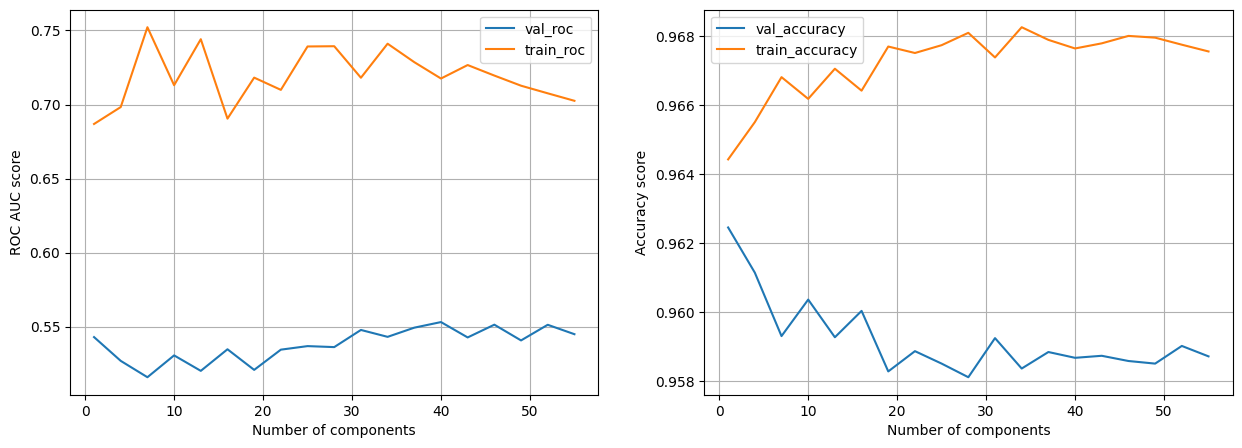

In [29]:
fig, [ax_roc, ax_acc] = plt.subplots(1,2,figsize=(15, 5))

scores[['val_roc', 'train_roc']].plot(ax=ax_roc)
ax_roc.grid(zorder=3)
ax_roc.set_xlabel('Number of components')
ax_roc.set_ylabel('ROC AUC score')

scores[['val_accuracy', 'train_accuracy']].plot(ax=ax_acc)
ax_acc.grid(zorder=3)
ax_acc.set_xlabel('Number of components')
ax_acc.set_ylabel('Accuracy score')

print(f"Best number of components: {scores['val_roc'].idxmax()}")
print(f"Best ROC AUC score:        {np.max(scores['val_roc'] * 100):.3f}%")

We were able to get slightly better result on 40 components. Much more interesing are trends that come with growing number of components. ROC AUC score was almost not affected by number of components, validation score rose slowly, but nothing more. In contrast validation accuracy degraded with greater number of components, while training accuracy grew. We can see that lesser principal components created less overfitted model, that gave better results.

## 8. Combining previous steps

We will not use binning for our model, because it does not usually improve models; additionaly as stated in section 3, it creates bins, that have no connection with explained variable, that are limiting decision trees abilities. We trained and validated all methods on raw dataset, so it will be meaningful to try to train and validate them on engineered dataset. 

We are left to choose between feature selection methods (including PCA) and data balancing. Data balancing showed need to be regularized, which feature selection ultimately does, so we will check balancing options after we have chosen feature selector.

### Choosing features selectors on engineered dataset

Now let's try both feature selectors and PCA on engineered data.

In [30]:
evaluate_transformer(impure_selector, Xeng_train, Xeng_val)

Accuracy train score:  96.67%
Accuracy valid score:  95.99%

ROC AUC train score:  68.00%
ROC AUC valid score:  57.72%


In [31]:
%%time
evaluate_transformer(rfe_selector, Xeng_train, Xeng_val)

Accuracy train score:  96.80%
Accuracy valid score:  95.85%

ROC AUC train score:  72.31%
ROC AUC valid score:  55.92%
CPU times: user 4min 33s, sys: 4.68 s, total: 4min 38s
Wall time: 4min 39s


In [32]:
scores, var = score_pca(Xeng_train, Xeng_val, step=15)
scores.tail()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [06:14<00:00, 14.42s/it]


,val_accuracy,val_roc,train_accuracy,train_roc
316,0.961677,0.584948,0.965407,0.611587
331,0.962173,0.578604,0.964934,0.602786
346,0.961896,0.581008,0.964954,0.602715
361,0.961501,0.576164,0.965239,0.612804
376,0.962114,0.580722,0.964853,0.609866


Best number of components: 316
Best ROC AUC score:        58.495%


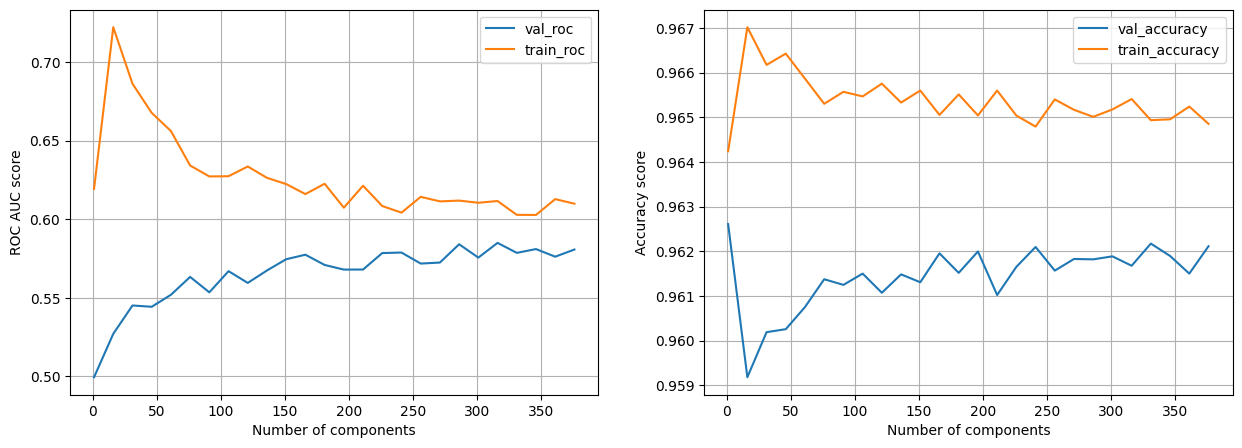

In [34]:
fig, [ax_roc, ax_acc] = plt.subplots(1,2,figsize=(15, 5))

scores[['val_roc', 'train_roc']].plot(ax=ax_roc)
ax_roc.grid(zorder=3)
ax_roc.set_xlabel('Number of components')
ax_roc.set_ylabel('ROC AUC score')

scores[['val_accuracy', 'train_accuracy']].plot(ax=ax_acc)
ax_acc.grid(zorder=3)
ax_acc.set_xlabel('Number of components')
ax_acc.set_ylabel('Accuracy score')

print(f"Best number of components: {scores['val_roc'].idxmax()}")
print(f"Best ROC AUC score:        {np.max(scores['val_roc'] * 100):.3f}%")

PCA once again showed interesting results. This time with the number of components both validation ROC AUC score and accuracy rose and training scores sunk. This case is very different from the case of original dataset, because for most possible number of components decision tree was not able to use all of them, due to its shallowness.

The best feature selection algorithm is PCA with 316 principal components so our final preprocessor will be a feature enginner followed by PCA.

In [35]:
final_ppr = pipeline(
    feature_engineer, PCA(n_components=316, random_state=RND_SEED)
)

final_ppr

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('featureunion',
                                  FeatureUnion(n_jobs=-1,
                                               transformer_list=[('topic_rbg',
                                                                  ColumnTransformer(n_jobs=-1,
                                                                                    transformers=[('xind',
                                                                                                   RadialBaseGaussian(),
                                                                                                   ['xind_01',
                                                                                                    'xind_02_cat',
                                                                                                    'xind_03',
                                                                                                    'xind_04_cat',
                                                                                                    'xind_05_cat',
                                                                                                    'xind_06_bin',
                                                                                                    'xind_07_bin',
                                                                                                    'xind_08_bin',
                                                                                                    'xind_09_bin',
                                                                                                    'xind_10_bin',
                                                                                                    'xind_11_bin',
                                                                                                    'xind_12_bin',
                                                                                                    'xin...
                                                                                                                      interaction_only=True),
                                                                                                   ['xind_15',
                                                                                                    'xcalc_10',
                                                                                                    'xcalc_09',
                                                                                                    'xcar_12',
                                                                                                    'xcalc_03',
                                                                                                    'xreg_01',
                                                                                                    'xcalc_08',
                                                                                                    'xcalc_07',
                                                                                                    'xind_01',
                                                                                                    'xcar_11',
                                                                                                    'xcalc_14',
                                                                                                    'xreg_02',
                                                                                                    'xcalc_05',
                                                                                                    'xcar_13',
                                                                                                    'xcar_14',
                                                                                                    'xcalc_12',
                                                       

### Choosing data balancing with chosen preprocessor

In [36]:
evaluate_transformer(final_ppr, Xunder, Xval, yunder)

Accuracy train score:  87.11%
Accuracy valid score:  42.97%

ROC AUC train score:  92.02%
ROC AUC valid score:  52.66%


In [37]:
%%time
evaluate_transformer(final_ppr, Xover, Xval, yover)

Accuracy train score:  82.06%
Accuracy valid score:  78.05%

ROC AUC train score:  90.74%
ROC AUC valid score:  50.68%
CPU times: user 1min 10s, sys: 9.02 s, total: 1min 19s
Wall time: 1min 12s


Both methods showed no improvment, so we will not use data balancing.

## Testing whole model

Let's create the final model. 

Then we will merge training and validation dataset to train estimator on their union and evaluate it on test dataset.

In [38]:
model = pipeline(
    final_ppr,
    DecisionTreeClassifier(
        random_state=RND_SEED, criterion='gini', max_depth=15, splitter='random'
    )
)

base_model = DecisionTreeClassifier(random_state=RND_SEED, criterion='gini', max_depth=15, splitter='random')
model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('featureunion',
                                                   FeatureUnion(n_jobs=-1,
                                                                transformer_list=[('topic_rbg',
                                                                                   ColumnTransformer(n_jobs=-1,
                                                                                                     transformers=[('xind',
                                                                                                                    RadialBaseGaussian(),
                                                                                                                    ['xind_01',
                                                                                                                     'xind_02_cat',
                                                                                                                     'xind_03',
                                                                                                                     'xind_04_cat',
                                                                                                                     'xind_05_cat',
                                                                                                                     'xind_06_bin',
                                                                                                                     'xind_07_bin',
                                                                                                                     'xind_08_bin',
                                                                                                                     'xind_09_bin',
                                                                                                                     'xind_10_bin',
                                                                                                                     'xin...
                                                                                                                     'xcalc_07',
                                                                                                                     'xind_01',
                                                                                                                     'xcar_11',
                                                                                                                     'xcalc_14',
                                                                                                                     'xreg_02',
                                                                                                                     'xcalc_05',
                                                                                                                     'xcar_13',
                                                                                                                     'xcar_14',
                                                                                                                     'xcalc_12',
                                                                                                                     'xcalc_04',
                                                                                                                     'xreg_03',
                                                                                                                     'xind_03',
                                                                                                                     'xcalc_13',
                                                                                                                     'xcar_15',
                                                                              

In [39]:
Xfinal = pd.concat([Xtrain, Xval])
yfinal = pd.concat([ytrain, yval])

print(f"Xfinal shape: {Xfinal.shape}")
Xfinal.head()

Xfinal shape: (476169, 57)


,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,...,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
265163,2.0,1,8.0,0,0,0,0,1,0,0,...,6.0,0.0,3.0,2.0,0,0,0,0,0,1
429303,0.0,1,3.0,1,0,1,0,0,0,0,...,4.0,2.0,1.0,9.0,1,0,1,0,0,0
79518,1.0,2,1.0,0,0,1,0,0,0,0,...,6.0,3.0,5.0,9.0,0,1,1,1,0,0
590659,0.0,1,10.0,1,6,0,0,0,1,0,...,5.0,3.0,3.0,9.0,0,1,1,1,1,0
469084,3.0,1,7.0,0,4,1,0,0,0,0,...,6.0,3.0,6.0,10.0,0,1,0,1,1,0


In [40]:
from sklearn.metrics import RocCurveDisplay

model.fit(Xfinal, yfinal)
yfinal_pred = model.predict(Xfinal)
yfinal_pred_proba = model.predict_proba(Xfinal)[:, 1]

ytest_pred = model.predict(Xtest)
ytest_pred_proba = model.predict_proba(Xtest)[:, 1]

base_model.fit(Xfinal, yfinal)
base_yfinal_pred = base_model.predict(Xfinal)
base_yfinal_pred_proba = base_model.predict_proba(Xfinal)[:, 1]

base_ytest_pred = base_model.predict(Xtest)
base_ytest_pred_proba = base_model.predict_proba(Xtest)[:, 1]

Accuracy train score |   Preprocessed: 0.9650       Original: 0.9679    
Accuracy test score  |   Preprocessed: 0.9619       Original: 0.9585    

ROCAUC train score   |   Preprocessed: 0.6133       Original: 0.7420    
ROCAUC test score    |   Preprocessed: 0.5843       Original: 0.5624    


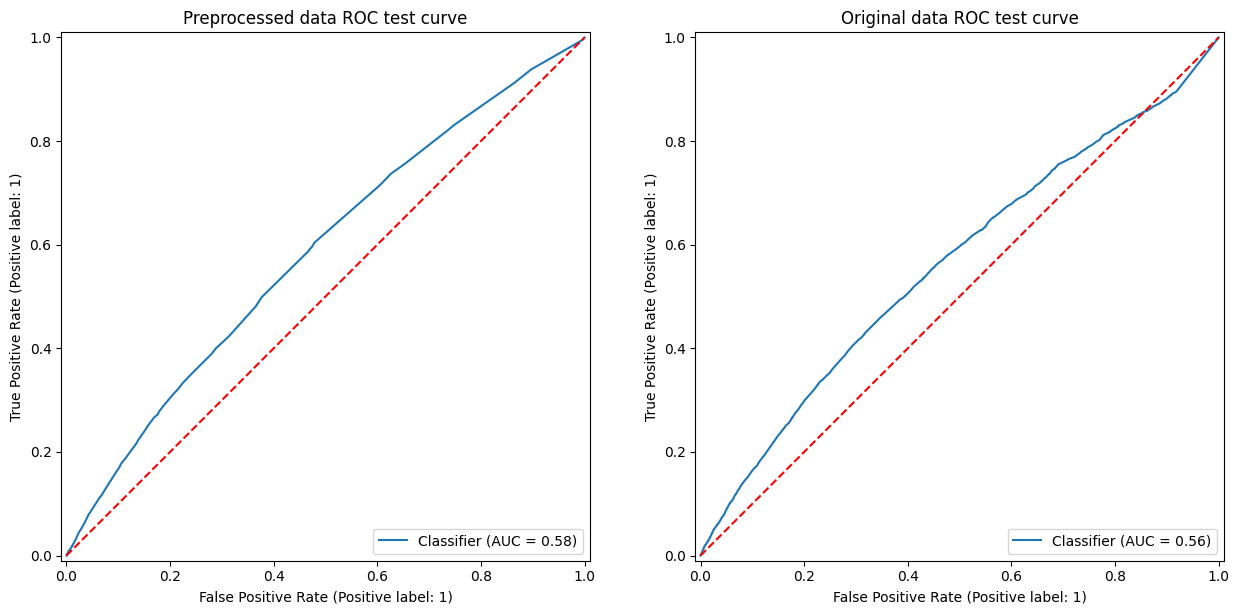

In [41]:
fig, [ax_final, ax_base] = plt.subplots(1, 2, figsize=(15, 7))

RocCurveDisplay.from_predictions(ytest, ytest_pred_proba, ax=ax_final)
RocCurveDisplay.from_predictions(ytest, base_ytest_pred_proba, ax=ax_base)
ax_final.plot([0,1], [0,1], c='r', linestyle='--')
ax_base.plot([0,1], [0,1], c='r', linestyle='--')
ax_final.set_title('Preprocessed data ROC test curve')
ax_base.set_title('Original data ROC test curve')


print(f"Accuracy train score |   Preprocessed: {accuracy_score(yfinal, yfinal_pred) : <12.4f} Original: {accuracy_score(yfinal, base_yfinal_pred) : <10.4f}")
print(f"Accuracy test score  |   Preprocessed: {accuracy_score(ytest, ytest_pred) : <12.4f} Original: {accuracy_score(ytest, base_ytest_pred) : <10.4f}")
print()
print(f"ROCAUC train score   |   Preprocessed: {ROCAUC(yfinal, yfinal_pred_proba) : <12.4f} Original: {ROCAUC(yfinal, base_yfinal_pred_proba) : <10.4f}")
print(f"ROCAUC test score    |   Preprocessed: {ROCAUC(ytest, ytest_pred_proba) : <12.4f} Original: {ROCAUC(ytest, base_ytest_pred_proba) : <10.4f}")

We can see that we were able to improve validation score by 2% and the same time reduced train score by 10%, so our model overfits less. We have also slightly imporved prediction accuracy. We could have chosen other threshold for predicting based on ROC curve and we probably would improve accuracy score even more. Another thing to notice is that decision tree failed misearbly to predict true samples on low threshold values, thus dipping under $y=x$ diagonal. After preprocessing our model became more confident and such region disappeared.

## Conclusion

We have tried different approaches in data preprocessing to improve shallow decision tree's results measured by ROC AUC score. We have seen equal-depth and equal-depth binning, undersampling using Near Miss algorithm and oversampling using Borderline SMOTE, engineered new multiplicative and radial based features, ran feature selection using recursive feature elimination and feature selection based on featurewise gini coeficient gain, run PCA and explained impact of different numbers of components on model's performance. Lastly we have combined different approaches and improved ROC AUC score for shallow decision tree.

## References

[Scikit-learn documentation](https://scikit-learn.org/stable/)

[Imbalanced-learn documentation](https://imbalanced-learn.org/stable/)